# Analysis for csv files

## Load data file

In [75]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.optimize import curve_fit
from operator import itemgetter

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 20,
         'axes.titlesize':24,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

filename = 'python_with_c/data/data_multi_0411.csv'

data = np.genfromtxt(filename, delimiter=',', skip_header=4)
data = sorted(data, key=itemgetter(0))
temp = np.array([i[0] for i in data])
mag = np.array([i[1] for i in data])
magstdev = np.array([i[2] for i in data])
energy = np.array([i[3] for i in data])
energystdev = np.array([i[4] for i in data])
magstd2 = np.array([i[5] for i in data])
energystd2 = np.array([i[6] for i in data])

'''
#not multicore
temp = data[:,0]
mag = data[:,1]
magstdev = data[:,2]
energy = data[:,3]
energystdev = data[:,4]
magstd2 = data[:, 5]
energystd2 = data[:, 6]
'''

'\n#not multicore\ntemp = data[:,0]\nmag = data[:,1]\nmagstdev = data[:,2]\nenergy = data[:,3]\nenergystdev = data[:,4]\nmagstd2 = data[:, 5]\nenergystd2 = data[:, 6]\n'

1.01

In [35]:
filename = 'python_with_c/data/corr_80.csv'
corr = np.genfromtxt(filename, delimiter=',', skip_header=4)


# Analysis for data.csv
- units: $k_b = 1$
- $|M|$, gives $T_c$
- $c_v$ = $\frac{\beta}{T}Var(E)$ = $\frac{1}{k_bT^2}Var(E)$, gives a log fit (theory: $\alpha = 0$) 
- $\chi$ = $\beta Var(|M|)$, gives $\gamma$ (theory: $\gamma = 7/4$)

In [8]:
#get t_c from |M| by guessing a value and plotting. 
def m_func(t):
    t_c = 2.3
    if t > t_c:
        return 0
    else:
        return np.real(float((1 - np.sinh(2/t)**(-4)))**(1/8))   

#from critical region
#def m_func(t, a, beta, c):
#    t_c = 2.26
#    return a*np.abs((t - t_c)/t_c)**beta + c

#params = curve_fit(m_func, temp[24:30], mag[24:30])
#print(params[0])

In [ ]:
#error for t_c

#write chi^2 analysis
t_c_chi2 = np.sum(/m)
#minimize chi^2 by changing t_c slightly 
#go to 2*chi^2 on either side by varying t_c and call that the error range. 

In [34]:
list1 = [1,2,3,4,5,6,7,8,9]
np.average(list1)
list(np.mean(np.array(list1).reshape(-1, 3), axis=1))

5.0

Text(0.5,0,'Temperature ($J/k_B$)')

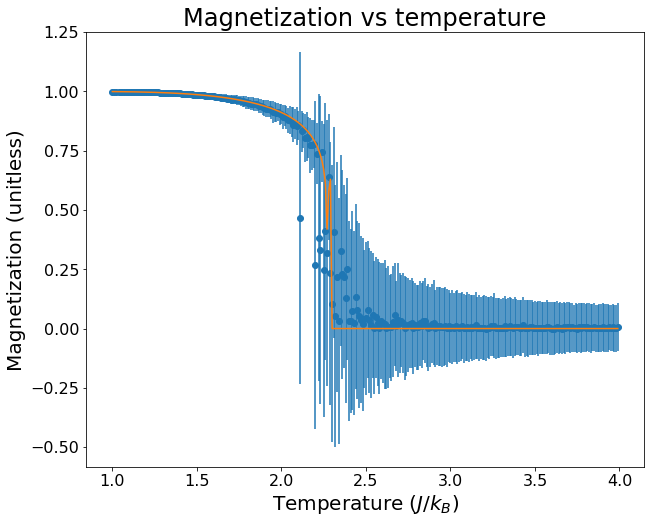

In [76]:
#|M| plotting

plt.scatter(temp, mag)
plt.errorbar(temp, mag, magstdev, linestyle='None')
plt.plot(temp, [m_func(i) for i in temp])
#plt.plot(temp[25:40], m_func(temp[25:40], params[0][0], params[0][1], params[0][2]), )
plt.title('Magnetization vs temperature')
plt.ylabel('Magnetization (unitless)')
plt.xlabel('Temperature ($J/k_B$)')

In [129]:
temp[26]

2.300000000000001

In [92]:
#fit for C_v and get critical exponent, alpha  

#t_c found from M fit
def cv_func(t, a):
    t_c = 2.3
    return a*np.log(np.abs((t - t_c)/t_c)) 

#remove data point near crit temperature
#temp = np.delete(temp, 26)
#energystdev = np.delete(energystdev, 26)
#mag = np.delete(mag, 26)
#magstdev = np.delete(magstdev, 26)
params = curve_fit(cv_func, temp, 1/(temp**2)*energystdev**2)

In [89]:
#chi^2 for fit and error on alpha 
print(temp[120:150])
test = 1/(temp**2)*energystdev**2
print(test[120:150])

[2.21 2.22 2.23 2.24 2.25 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34
 2.35 2.36 2.37 2.38 2.39 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48
 2.49 2.5 ]
[0.00375067 0.0045733  0.00413872 0.0035751  0.00510607 0.00456419
 0.00510157 0.004382   0.00473776 0.00450543 0.00410647 0.00466803
 0.00428724 0.00428758 0.0040579  0.00379405 0.00389365 0.00350101
 0.00381965 0.00311219 0.0028308  0.00308819 0.00301703 0.00314827
 0.0029502  0.00299741 0.00253336 0.00235887 0.00213603 0.00227852]


Text(0.5,0,'Temperature ($J/k_B$)')

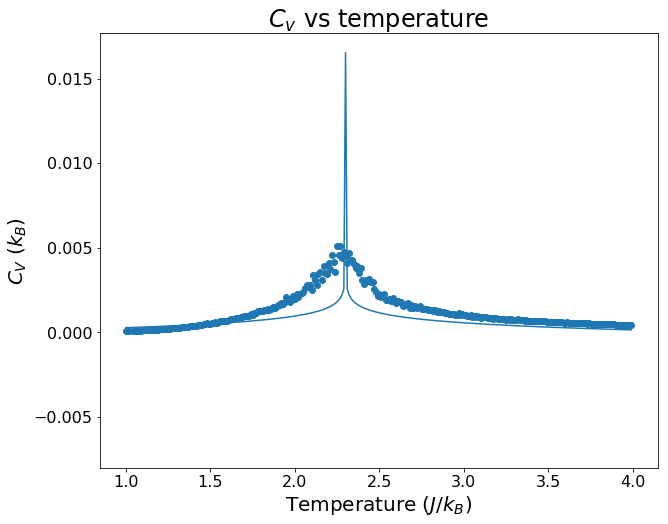

In [94]:
#C_v plotting

plt.scatter(temp, 1/(temp**2)*energystdev**2)
#plt.errorbar(temp, mag, magstdev, linestyle='None')
plt.plot(temp, cv_func(temp, params[0][0]))#[cv_func(i, params[0][0], params[0][1]) for i in temp])
plt.title('$C_v$ vs temperature')
plt.ylabel('$C_V$ ($k_B$)')
plt.xlabel('Temperature ($J/k_B$)')

In [189]:
len(temp)

59

In [79]:
#fit for Chi and get critical exponent, gamma
def chi_func(t, a, gamma):
    t_c = 2.3
    return a*(np.abs((t - t_c)/t_c))**(-1*gamma)

#the critical point data is still removed from c_v
params = curve_fit(chi_func, temp, 1/temp*magstdev**2)

In [25]:
#get chi^2 of fit and error on gamma

array([0.00509459, 0.71805228])

IndexError: index 1 is out of bounds for axis 0 with size 1

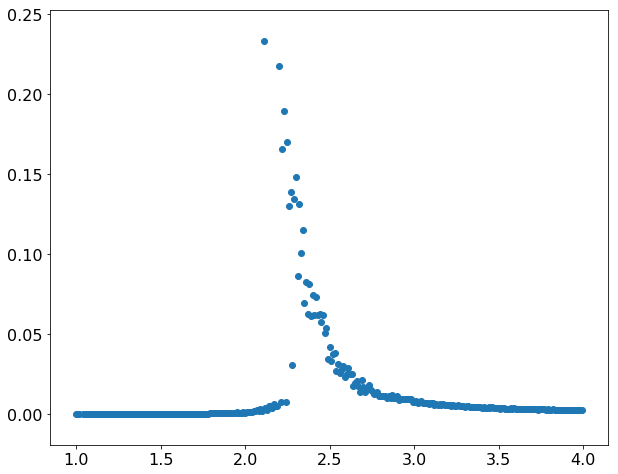

In [95]:
#Chi plotting

plt.scatter(temp, 1/(temp)*magstdev**2)
plt.plot(temp, chi_func(temp, params[0][0], params[0][1]))
plt.title('$\chi$ vs temperature')
plt.ylabel('$\chi$ ($J^{-1}$)')
plt.xlabel('Temperature ($J/k_B$)')